# Lab 6 - Mathematical Distributions

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import eda
import scipy.stats
from tabulate import tabulate
from pprint import pprint

sns.set(style="whitegrid")

## Problem 1

The following data are measurements (in millimeters) of rainbow trout caught in the Arolik River of Alaska.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [3]:
trout = [572.4, 417.9, 423.3, 559.9, 459.0, 416.9, 534.4, 464.4, 476.3, 423.9, 466.0,
 437.0, 471.4, 486.2, 483.5, 470.0, 533.7, 419.5, 475.5, 485.8, 533.7, 529.5,
 464.6, 436.3, 448.0, 523.8, 457.2, 456.1, 458.0, 583.9, 455.7, 461.4, 482.9,
 505.5, 373.4, 372.3, 518.0, 472.6, 529.9, 536.3, 509.6, 475.3, 471.9, 477.1,
 488.5, 458.6, 543.6, 499.5]

1. We can see we have a list of data, and that this variable is a numeric variable. We can start our EDA by looking at some descriptive statistics.

In [4]:
stats = [['count', len(trout)], ['mean', np.mean(trout)], ['std', np.std(trout)], 
        ['min', np.min(trout)], ['25%', np.quantile(trout, 0.25)], 
        ['50%', np.quantile(trout, 0.50)], ['75%', np.quantile(trout, 0.75)],  
        ['max', np.max(trout)]]

tabulate(stats, headers=['Stat', 'Trout'], tablefmt='html',floatfmt='.1f')

Stat,Trout
count,48.0
mean,479.2
std,46.1
min,372.3
25%,456.9
50%,474.0
75%,511.7
max,583.9


We can see the same info that we would normally get with the describe method in pandas. We have a mean of 479.2 and a median of 474.0, so we expect this data to have a right skew. We can see that the min is 372.3 while max is 583.9, and note the 1st Quartile Range, 
456.9, is fairly close to the median of 474.0.

Now we can take a look at some charts. Since this is a numeric variable, we can look at a histogram first to visualize the distribution.

Text(0, 0.5, 'Counts')

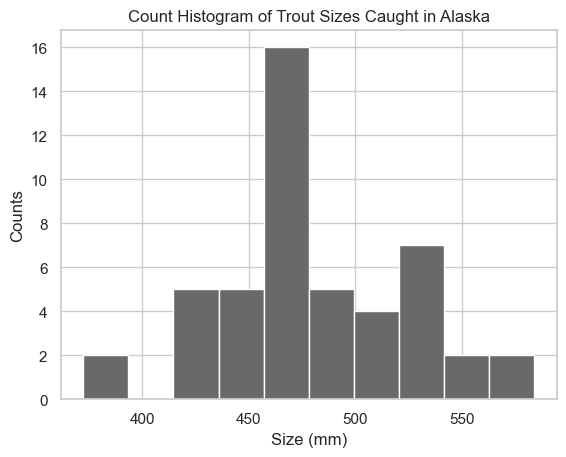

In [5]:

plt.hist(trout, color='dimgray')
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')
plt.ylabel('Counts')

We see that most trouts fall within the 425-550 range, roughly. There are a few low values, and I think changing the bin size to include more bins would help, so let's do that.

Text(0, 0.5, 'Counts')

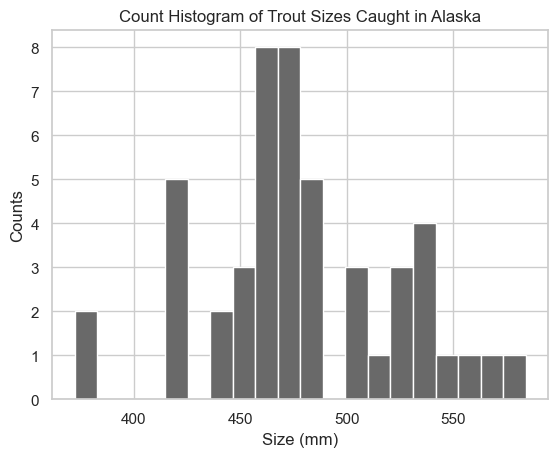

In [6]:
plt.hist(trout, color='dimgray', bins=20)
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')
plt.ylabel('Counts')

Here we can see that again we have the low values below 400mm, and a bit of a separation around 500mm. Next, let's look at a boxplot to get a better picture of the data. I'm expecting it to be consitent with the histograms.

Text(0.5, 0, 'Size (mm)')

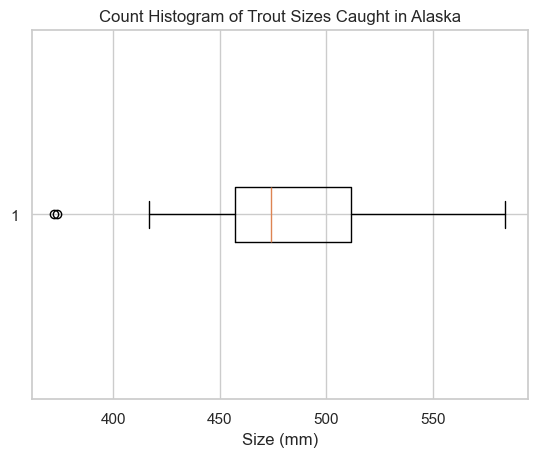

In [7]:
plt.boxplot(trout, vert=False)
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')


We see the expected result. There are some extreme values here and a right skew, and gives us a good idea of the interquartile range as well.

2. Now we can create a mean model with error bounds. 

In [8]:
tabulate(stats, headers=['Stat', 'Trout'], tablefmt='html',floatfmt='.1f')

Stat,Trout
count,48.0
mean,479.2
std,46.1
min,372.3
25%,456.9
50%,474.0
75%,511.7
max,583.9


Remember that the mean is 479.2 and the standard deviation is 46.1. We can use the mean $\bar{y}$ as our predicted variable $\hat{y}$, and our standard deviation as s. From our EDA above, the data does not appear symmetric to me, so I will use Chebyshev's inequality, that x percent of the data should be within 1 - (1/k^2) standard deviations. In this case, about 75% of the data will be between k = 2 standard deviations, meaning we can create error bounds as ($\hat{y} - 2*s$, $\hat{y} + 2*s $).

In [9]:
y_hat = np.mean(trout)
y_std = np.std(trout)
lower_bound = y_hat - (2*y_std)
upper_bound = y_hat + (2*y_std)



bounds = [['mean', np.mean(trout)], ['std', np.std(trout)],
          ['Lower Bound', lower_bound], ['Upper Bound', upper_bound]]

tabulate(bounds, headers=['Bounds', 'Trout'], tablefmt='html',floatfmt='.1f')

Bounds,Trout
mean,479.2
std,46.1
Lower Bound,387.0
Upper Bound,571.4


So there is an 75% chance a predicted trout size will fall between 387.0mm and 571.4mm.

3. I think the data generating story is that rainbow trout size can vary depending on a trout's diet/how much they get to eat. Their metabolism can be dependent on water temperature, which will also affect their size, and the size of their prey is another factor to consider. I'd argue these effects are additive, and so a Gaussian distribution may be a good predictive model for this data.

4. We know the parameters for the Gaussian distribution and mean and standard deviation. Again, the mean is 479.2 and the standard deviation is 46.1. Let's create the model.

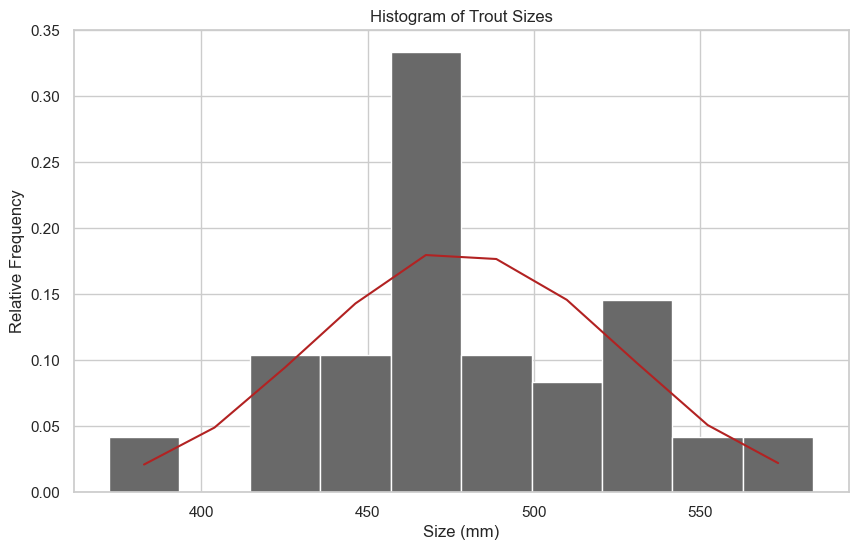

In [10]:
fig = plt.figure(figsize=(10,6))

data = trout
mu = np.mean(trout)
std = np.std(trout)


axes = fig.add_subplot(1,1,1)
emp_weights = np.ones(len(trout)) / len(trout)
n, bins, patches = axes.hist(trout, color='dimgray', weights=emp_weights)

axes.set_xlabel('Size (mm)')
axes.set_ylabel('Relative Frequency')
axes.set_title('Histogram of Trout Sizes')

xs = [(b2+b1)/2 for b1, b2 in zip(bins, bins[1:])]

sampled_data = [mu + r*std for r in np.random.standard_normal(10000)]
samp_weights = np.ones(len(sampled_data)) / len(sampled_data)
vals, base = np.histogram(sampled_data, bins=bins, weights=samp_weights)
axes.plot(xs, vals, color='firebrick')

plt.show()
plt.close()

This model overestimates size around 425-450mm as well as 475-525mm, roughly. It underestimates size in the 450-475mm range as well as 525-550mm range, roughly.

For the first prediction, we can predict what the probability is that a random rainbow trout has a size greater than 500.0mm? Let's use the scipy survival method for a normal/Gaussian distribution:

In [11]:
pred1 = scipy.stats.norm.sf(500.0, mu, std) * 100
tabulate([[pred1]], headers=['Pr size > 500.0mm'], tablefmt='html', floatfmt='.2f')

Pr size > 500.0mm
32.57


So there's about a 33% chance a random trout will be larger than 500.0mm, using this model.

Next let's ask what the probability is a random trout has a size between than 400mm - 475mm.

In [12]:

pred2 = (scipy.stats.norm.cdf(475.0, mu, std) - scipy.stats.norm.cdf(400.0, mu, std)) * 100
tabulate([[pred2]], headers=['Pr size  400.0mm-475.0mm'], tablefmt='html', floatfmt='.2f')

Pr size 400.0mm-475.0mm
42.10


We see about a 42% chance that we have a random trout between 400mm and 475mm.

Finally, let's predict, using this model, what the size or larger a trout would likely to be with 15% probability.

In [13]:
pred3 = (scipy.stats.norm.isf([0.15],mu, std))
tabulate([[pred3]], headers=['Size or larger 15%'], tablefmt='html', floatfmt='.1f')

Size or larger 15%
527.0


We are likely to see a trout larger than 527.0mm with 15% probability.

## Problem 2

The following data represent the number of days it takes a software team to clear tickets.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [14]:
days = [8.0, 3.8, 4.0, 1.6, 2.6, 3.4, 8.7, 4.7, 6.1, 1.9, 6.0, 8.2, 2.7, 6.5, 1.9, 2.7,
 1.6, 1.3, 2.3, 3.3, 9.8, 8.3, 3.3, 4.3, 4.7, 7.2, 5.8, 3.3, 2.0, 3.2, 1.7, 2.5,
 1.6, 4.0, 4.1, 1.0, 2.7, 5.3, 7.6, 1.5, 7.1, 2.5, 2.6, 4.0, 1.3, 7.0, 4.0, 8.4,
 1.3, 5.1, 6.4, 3.1, 1.5, 4.1, 2.5, 5.5, 2.4, 1.4, 2.6, 1.9, 2.1, 2.0, 2.5, 2.2,
 2.6, 3.1, 3.6, 1.8, 3.1, 4.6, 1.2, 5.4, 6.5, 7.0, 9.7, 6.6, 9.1, 6.9, 2.5, 8.5,
 5.0, 3.2, 0.9, 3.3, 2.9, 3.9, 12.1, 3.4, 2.9, 4.6, 4.5, 1.7, 1.2, 3.6, 3.9,
 14.2, 5.3, 1.2, 0.3, 2.3, 2.9, 2.5, 0.8, 1.6, 2.7, 4.6, 4.4, 2.7, 3.5, 0.6,
 4.9, 2.2, 5.4, 6.0, 1.8, 1.0, 1.5, 4.0, 2.1, 5.6, 4.1, 1.9, 1.7, 3.8, 5.7, 4.1,
 2.3, 5.1, 8.4, 4.8, 3.7, 2.2, 2.6, 2.8, 0.5, 3.9, 2.9, 3.7, 2.6, 2.5, 11.7,
 3.3, 1.5, 7.3, 1.1, 0.3, 0.9, 0.5, 8.4, 2.8, 6.1, 3.4, 4.7, 10.0, 1.9, 5.8,
 6.4, 4.6, 0.4, 6.8, 5.3, 3.9, 1.2, 2.6, 3.4, 2.4, 3.7, 14.5, 10.3, 0.1, 0.8,
 0.4, 9.8, 6.3, 4.5, 1.0, 2.8, 5.6, 1.4, 1.7, 2.5, 1.7, 1.6, 23.0, 0.2, 3.1,
 1.5, 0.7, 2.4, 4.2, 3.0, 2.0, 8.3, 2.5, 4.4, 3.0, 5.2, 4.3, 4.7, 5.4, 1.1, 1.8,
 9.9, 2.9, 3.0, 5.8, 2.0, 0.6, 3.1, 8.2, 5.7, 4.7, 8.4, 4.1, 3.4, 2.7, 9.3, 0.6,
 0.5, 1.8, 8.4, 3.4, 10.9, 6.0, 11.3, 2.9, 1.9, 3.3, 1.7, 11.5, 6.9, 6.4, 7.4,
 2.4, 1.3, 0.7, 15.5, 4.2, 2.5, 2.0, 6.2, 3.7, 3.5, 5.3, 4.1, 2.6, 0.9, 3.1,
 1.5, 1.7, 1.8, 0.9, 0.7, 1.2, 5.0, 3.8, 3.7, 7.2, 4.0, 2.9, 16.4, 1.2, 6.8,
 0.5, 2.4, 7.7, 5.5, 4.6, 5.5, 0.3, 4.2, 5.1, 0.5, 7.0, 1.1, 0.6, 0.8, 2.2, 8.6,
 1.5, 2.8, 3.2, 7.4, 3.6, 7.9, 3.0, 3.4, 4.8, 1.9, 1.6, 0.7, 4.6, 4.3, 2.6, 7.4,
 0.1, 1.8, 6.7, 0.4, 2.0, 2.8, 2.4, 5.4, 1.2, 4.2, 3.8, 5.6, 3.0, 2.8, 5.4, 6.7,
 2.5, 3.4, 5.0, 3.7, 2.4, 3.6, 5.9, 1.9, 9.9, 4.0, 4.9, 1.9, 2.9, 3.9, 2.9, 5.5,
 8.1, 3.6, 2.1, 5.1, 11.1, 9.0, 1.8, 3.7, 1.0, 1.4, 3.9, 3.2, 0.9, 2.0, 4.5,
 2.5, 7.5, 2.5, 1.5, 0.6, 3.1, 6.0, 2.6, 1.9, 5.5, 8.7, 1.4, 2.9, 1.2, 8.1, 4.8,
 3.8, 0.6, 3.1, 6.5, 5.4, 6.3, 4.3, 7.1, 5.2, 3.7, 3.4, 1.9, 1.9, 1.0, 6.5, 2.8,
 3.6, 2.2, 3.8, 5.9, 4.6, 5.4, 2.9, 1.1, 9.5, 5.0, 13.2, 5.7, 2.2, 4.2, 3.8,
 1.4, 1.0, 2.0, 6.3, 1.8, 4.2, 1.8, 2.2, 12.4, 5.9, 5.3, 1.1, 5.6, 4.6, 2.4,
 5.4, 4.5, 0.9, 5.5, 13.9, 0.8, 3.1, 1.3, 5.7, 6.3, 2.5, 0.5, 10.1, 1.4, 1.5,
 3.8, 1.6, 4.7, 5.8]

1. This variable is the number of days it takes to clear tickets, to the tenth of a day. This is a numeric variable, so we can take a look at some descriptive statistics again.

In [15]:
stats_days = [['count', len(days)], ['mean', np.mean(days)], ['std', np.std(days)], 
        ['min', np.min(days)], ['25%', np.quantile(days, 0.25)], 
        ['50%', np.quantile(days, 0.50)], ['75%', np.quantile(days, 0.75)],  
        ['max', np.max(days)]]

tabulate(stats_days, headers=['Stat', 'Days'], tablefmt='html',floatfmt='.1f')

Stat,Days
count,423.0
mean,4.0
std,2.9
min,0.1
25%,1.9
50%,3.4
75%,5.4
max,23.0


We see a mean of 4.0 days, standard deviation of 2.9 days. The min is 0.1 days and the max is 23.0 whole days! But we see the median is only 3.4, and the 3rd quartile range is only 5.4, so we are expecting to see a right skew. Let's check out a histogram.

Text(0, 0.5, 'Counts')

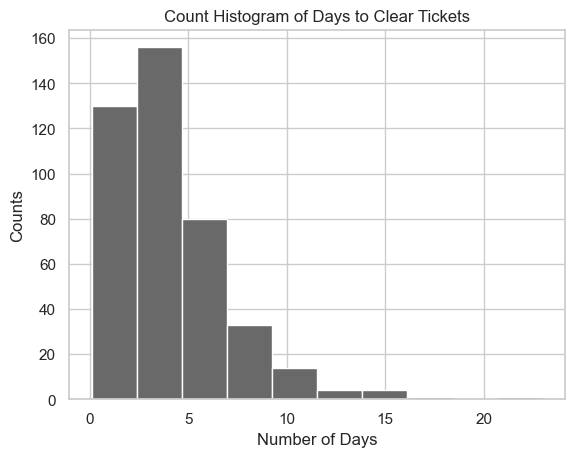

In [16]:
plt.hist(days, color='dimgray')
plt.title('Count Histogram of Days to Clear Tickets')
plt.xlabel('Number of Days')
plt.ylabel('Counts')

This is what we expected, a largely right skewed histogram. Once again we can try increasing the bin size to see if a clearer pattern emerges.

Text(0, 0.5, 'Counts')

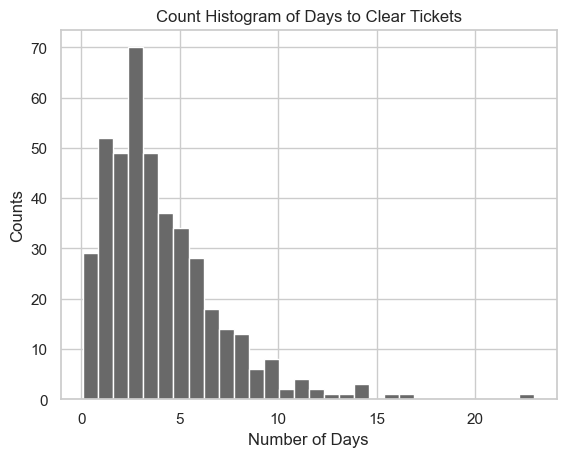

In [17]:
plt.hist(days, color='dimgray', bins=30)
plt.title('Count Histogram of Days to Clear Tickets')
plt.xlabel('Number of Days')
plt.ylabel('Counts')

I think this shows the data better with more bins. We clearly see most of the tickets are cleared before 10 days, with a large number before even 5 days. Of course we have a few extreme values including at 23.0 days, which we saw in the descriptive statistics.

Let's also take a quick look at a boxplot.

Text(0.5, 0, 'Days')

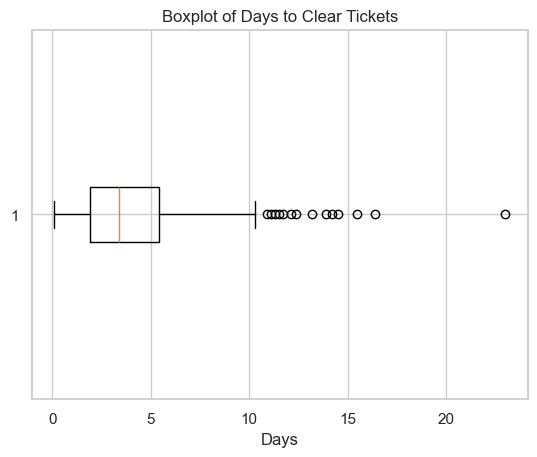

In [18]:
plt.boxplot(days, vert=False)
plt.title('Boxplot of Days to Clear Tickets')
plt.xlabel('Days')

Again we see a lot of extreme values on the high side, and the one way out at 23.0 days. The interquartile range is fairly small to note as well.

2. In order to create a mean model with error bounds, we can once again use Chebyshev's inequality. This data is definitely not symmetric, so we cannot use the standard 
(mean +/ 1.96 std_dev) approach. This time let's say that about 89% of the data will lie within 3 standard deviations of the mean:

In [19]:
y_hat = np.mean(days)
y_std = np.std(days)
lower_bound = y_hat - (3*y_std)
upper_bound = y_hat + (3*y_std)



bounds = [['mean', y_hat], ['std', y_std],
          ['Lower Bound', lower_bound], ['Upper Bound', upper_bound]]

tabulate(bounds, headers=['Bounds', 'Days'], tablefmt='html',floatfmt='.1f')

Bounds,Days
mean,4.0
std,2.9
Lower Bound,-4.8
Upper Bound,12.8


Now we know that we cannot have a negative amount of days, so the lower bound should really be 0.0. So roughly an 89% chance the amount of days to clear a ticket will be less than 12.8 days.

3. I think the data generating story is that the time it takes to clear a ticket can depend on how many workers show up a particular day. Whether the days included count weekends, holidays, and days when there are likely to be fewer people available to help. And we can talk about how complex the ticket is, from a simple task such as resetting a user's login credentials to configuring certain server or database issues. I think these are multiplicative issues, and so I will try using a Galton (log-normal) distribution to model the data.

4. We can use scipy fit to calculate maximum likelihood estimators here, since the method of moments for the mean and standard deviation are a little more complicated than the previous example.

In [20]:
days_mle = scipy.stats.lognorm.fit(days)
tabulate([days_mle], headers=['Mu', 'Std_Dev'], tablefmt='html', floatfmt='.4f')

,Mu,Std_Dev
0.5729,-0.8542,4.1576


We have the parameters as listed above. Not sure this is correct since the mu parameter is negative, but makes sense when considering the values of the data tend towards zero. I think those are labeled correctly, the library doesn't make it super clear what exactly gets returned in order, but it looks like location is second and scale is third. Let's look at a chart.

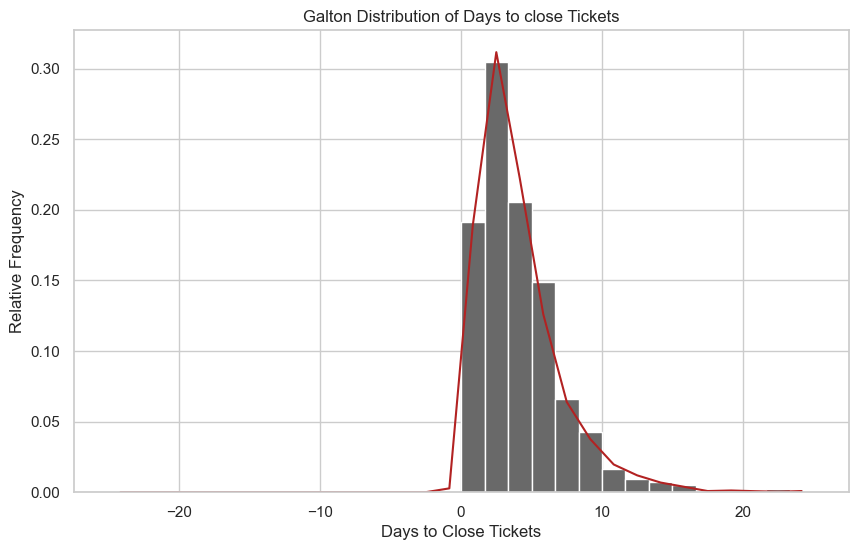

In [21]:
fig = plt.figure(figsize=(10,6))

data = days
mu = days_mle[1]
std = days_mle[2]

counts, divisions = np.histogram(days, range=(-25, 25), bins=30)


axes = fig.add_subplot(1,1,1)
axes.set_xlabel('Days to Close Tickets')
axes.set_ylabel('Relative Frequency')
axes.set_title('Galton Distribution of Days to close Tickets')

emp_weights = np.ones(len(days)) / len(days)
n, bins, patches = axes.hist(days, color='dimgray', bins=divisions, weights=emp_weights)

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]

samp_data = scipy.stats.lognorm.rvs(*days_mle, 10000)
samp_weights = np.ones(len(samp_data)) / len(samp_data)
vals, base = np.histogram(samp_data, bins=bins, weights=samp_weights)
axes.plot(xs, vals, color='firebrick')


plt.show()
plt.close()

We see that the fit with the Galton distribution does look fairly accurate for this data. Now let's look at some predictions.

For prediction 1, what is the probability a random ticket gets closed before 2 days?

In [22]:
pred1 = scipy.stats.lognorm.cdf(2.0, *days_mle) * 100
tabulate([[pred1]], headers=['Pr days < 2'], tablefmt='html', floatfmt='.2f')

Pr days < 2
25.57


About a 26% chance a ticket takes less than 2 days to close.

Next, what is the probability a random ticket will take more than a week, 7 days? (I'm assuming we are counting weekends, but we do not have enough info to determine whether these are business days or not).

In [23]:
pred2 = scipy.stats.lognorm.sf(7.0, *days_mle) * 100
tabulate([[pred2]], headers=['Pr days > 7'], tablefmt='html', floatfmt='.2f')

Pr days > 7
13.34


About 13% chance it will take over 7 days to close the ticket.

Finally, let's predict the interval for a 95% error bounds.

In [24]:
pred3 = scipy.stats.lognorm.ppf([0.025, 0.975], *days_mle)
pred3

array([ 0.49856017, 11.92363183])

We can compare the model with the empirical data too.

In [25]:
scipy.stats.mstats.mquantiles(days, [0.025, 0.975])

array([ 0.5  , 11.504])

We see that we expect the number of days that it takes to close a ticket will fall between roughly 0.5 and 11.9 days about 95% of the time, based off our model.

## Problem 3

Following the pattern established in the previous two problems, build two models for BMI. 
(At this point, if we give you a variable and say "model it" you should know what we expect...).

In [26]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv", header=0)

Let's do a basic EDA from this variable, even though we did that last week as well. We know this is a numeric variable so we can look at descriptive statistics.

In [27]:
bmi = insurance['bmi']
bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

We see mean of 30.6 and median of 30.4, so we would expect a somehwat symmetric distribution. We know bmi cannot be negative or zero too. We can use the histogram with whiskers and trio histrogram functions in the eda.py file to chart this variable.

Freeman Diaconis for bmi: 25 bins


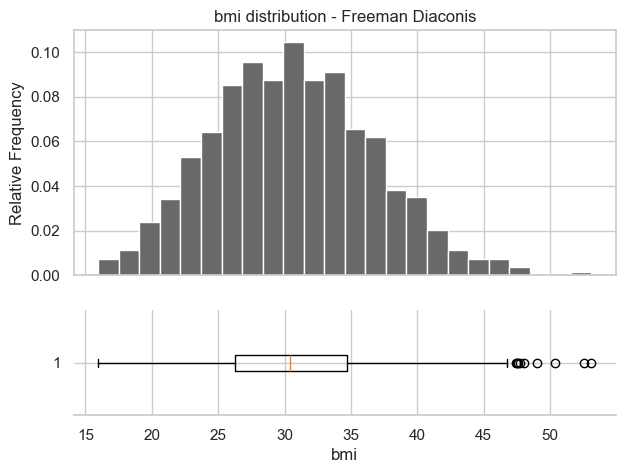

In [28]:
eda.histogram_w_whiskers(insurance, 'bmi')

We do in fact see a fairly symmetric distribution, with a few extreme values on the higher side above 45. The 1.5*IQR range is fairly large for this data. Next let's see the trio histograms.

Freeman Diaconis for bmi: 25 bins


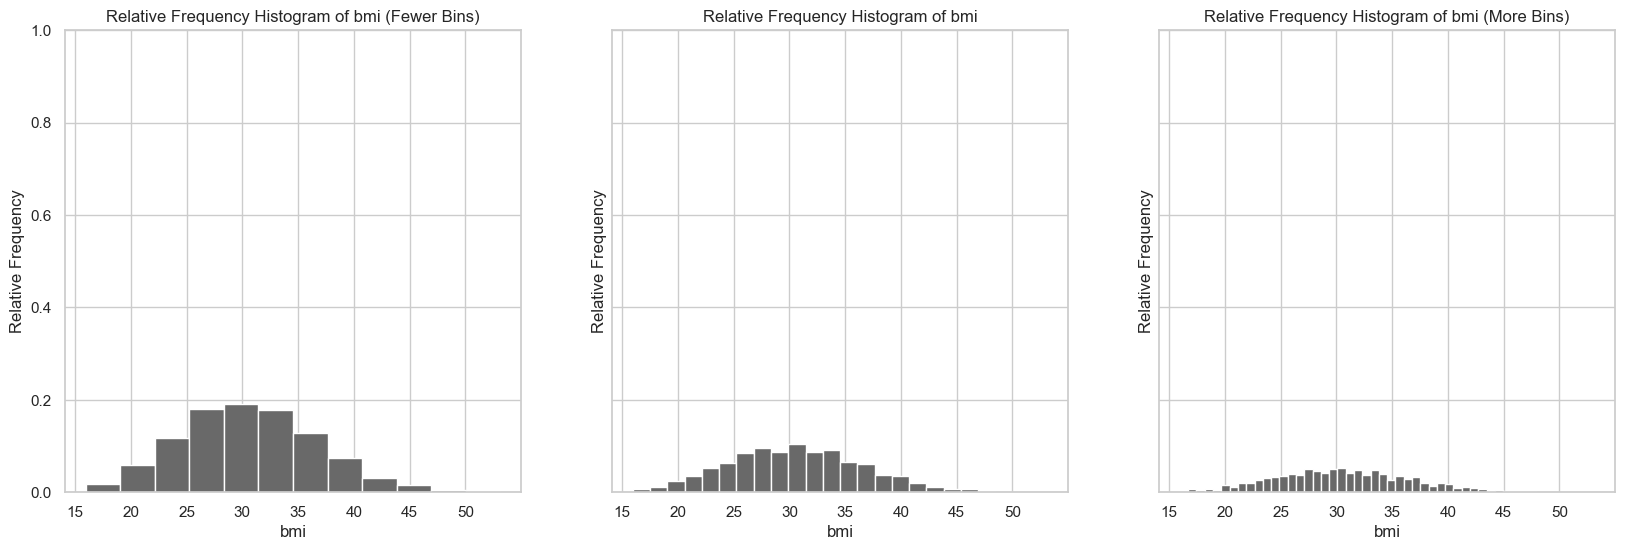

In [29]:
eda.histogram_trio(insurance, 'bmi')

I don't think we see anything too special by changing the bin size. Each histogram still shows a relatively symmetric distribution, and no emergent pattern arises that we could not see from the histogram with default bins.

2. Now we can create a mean model for this variable. We will use the mean and standard deviation from the empirical data as we've done for the previous 2 problems. Since it is symmetric we can find error bounds with ($\hat{y} - 1.96*s$, $\hat{y} + 1.96*s$) as the 95% probability interval

In [30]:
y_hat = np.mean(bmi)
y_std = np.std(bmi)
lower_bound = y_hat - (1.96*y_std)
upper_bound = y_hat + (1.96*y_std)



bounds = [['mean', y_hat], ['std', y_std],
          ['Lower Bound', lower_bound], ['Upper Bound', upper_bound]]

tabulate(bounds, headers=['Bounds', 'Bmi'], tablefmt='html',floatfmt='.1f')

Bounds,Bmi
mean,30.7
std,6.1
Lower Bound,18.7
Upper Bound,42.6


Again we have a mean of about 30.7, and we expect there to be a 95% chance that a predicted value for this model will fall between 18.7-42.6.

3. For the data-generating story, we can talk about how bmi has a variety of influences, from diet, to genetics, age, even stress/metabolism. Bmi also does not distinguish much between muscle and fat, so exercise is also a factor to consider. All of these seem to be small additive effects, and so I believe a Gaussian distribution would be sufficient to model this variable.

4. We can create a histogram and a model line to show whether a Gaussian distribution is a good fit.

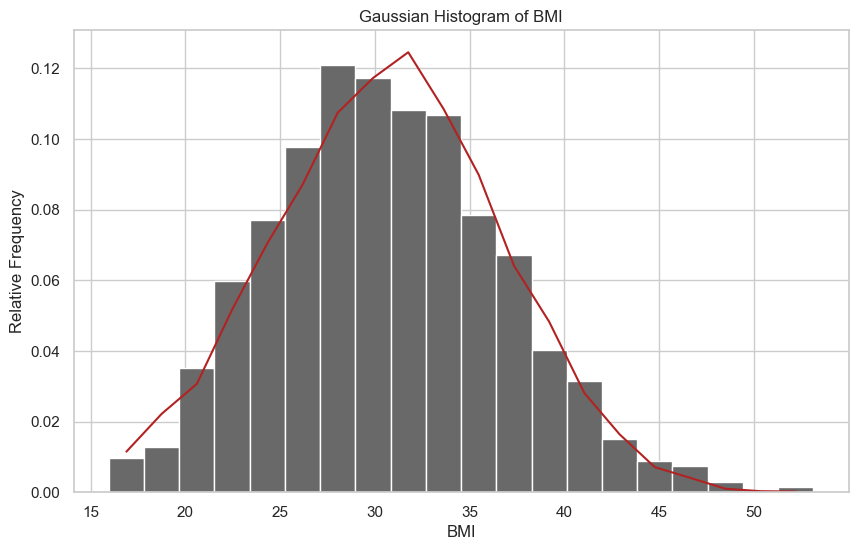

In [31]:
fig = plt.figure(figsize=(10,6))

data = bmi
mu = np.mean(bmi)
std = np.std(bmi)


axes = fig.add_subplot(1,1,1)
emp_weights = np.ones(len(bmi)) / len(bmi)
n, bins, patches = axes.hist(bmi, color='dimgray', weights=emp_weights, bins=20)

axes.set_xlabel('BMI')
axes.set_ylabel('Relative Frequency')
axes.set_title('Gaussian Histogram of BMI')

xs = [(b2+b1)/2 for b1, b2 in zip(bins, bins[1:])]

sampled_data = [mu + r*std for r in np.random.standard_normal(10000)]
samp_weights = np.ones(len(sampled_data)) / len(sampled_data)
vals, base = np.histogram(sampled_data, bins=bins, weights=samp_weights)
axes.plot(xs, vals, color='firebrick')

I think this model is reasonable. There is not too much overestimation or underestimation here, although we do see for example BMI around 17 may be overestimated, while BMI around 25-30 are a bit underestimated. Now we can make 3 predictions using this model.

For prediction 1, what is the probability a random person is classified as obese (has a BMI over 30)?

In [32]:
pred1 = scipy.stats.norm.sf(30.0, mu, std) * 100
tabulate([[pred1]], headers=['Pr BMI > 30.0'], tablefmt='html', floatfmt='.2f')

Pr BMI > 30.0
54.33


About 54% chance a random person is classified as obese. Remember bmi does not distinguish between muscle and fat too much, so this classification would also include heavy weightlifters and such.

For prediction 2, what is the probability a person is classified as healthy? 
(BMI 18.5-24.9)

In [33]:
pred2 = (scipy.stats.norm.cdf(24.9, mu, std) - scipy.stats.norm.cdf(18.5, mu, std)) * 100
tabulate([[pred2]], headers=['Pr BMI 18.5-24.9'], tablefmt='html', floatfmt='.2f')

Pr BMI 18.5-24.9
14.92


Almost a 15% chance a random person is classified as a healthy weight.

Our last prediction for this model will be, what bmi or larger will a person have with 10% probability?

In [34]:
pred3 = (scipy.stats.norm.isf([0.10],mu, std))
tabulate([[pred3]], headers=['Size or larger 10%'], tablefmt='html', floatfmt='.1f')

Size or larger 10%
38.5


So we are likely to a person's BMI of 38.5 or greater with 10% probability.

Now let's look at a second model for BMI. Since we know BMI cannot be negative and must be nonzero, we can try a Galton distribution. We'll use maximum likelihood estimators here again for this model.

In [35]:
bmi_mle = scipy.stats.lognorm.fit(bmi)
tabulate([bmi_mle], headers=['Mu', 'Std_Dev'], tablefmt='html', floatfmt='.4f')

,Mu,Std_Dev
0.1091,-25.1201,55.4527


I don't know why we get such a large negative value for location here, and the documentation doesn't really help explain the fit function. Let's create a chart to visualize.

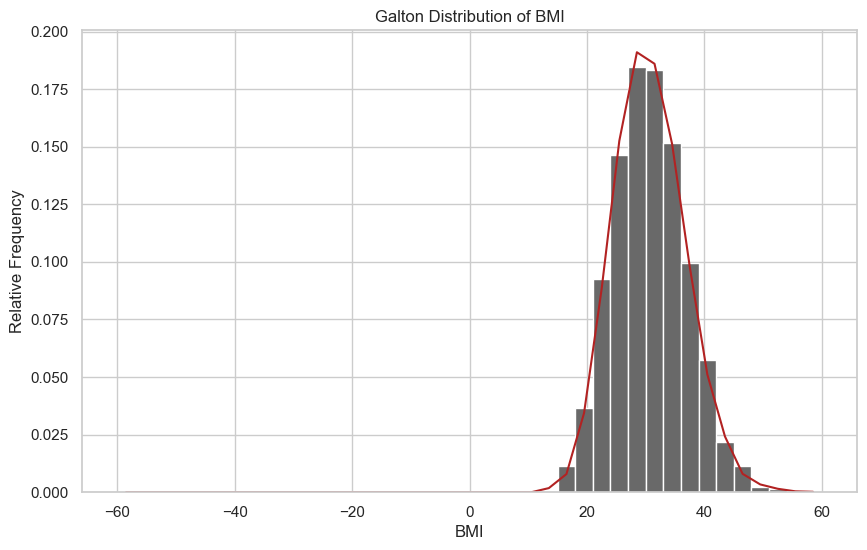

In [36]:
fig = plt.figure(figsize=(10,6))

data = bmi
mu = bmi_mle[1]
std = bmi_mle[2]

counts, divisions = np.histogram(bmi, range=(-60, 60), bins=40)


axes = fig.add_subplot(1,1,1)
axes.set_xlabel('BMI')
axes.set_ylabel('Relative Frequency')
axes.set_title('Galton Distribution of BMI')

emp_weights = np.ones(len(bmi)) / len(bmi)
n, bins, patches = axes.hist(bmi, color='dimgray', bins=divisions, weights=emp_weights)

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]

samp_data = scipy.stats.lognorm.rvs(*bmi_mle, 10000)
samp_weights = np.ones(len(samp_data)) / len(samp_data)
vals, base = np.histogram(samp_data, bins=bins, weights=samp_weights)
axes.plot(xs, vals, color='firebrick')

We can see that the Galton distribution is fairly reasonable for predicting this data. Now we can create 3 predictions.

For prediction 1, what is the probability a random person's BMI will be less than 18.5 (underweight)?

In [37]:
pred1 = scipy.stats.lognorm.cdf(18.5, *bmi_mle) * 100
tabulate([[pred1]], headers=['Pr bmi < 18.5'], tablefmt='html', floatfmt='.2f')

Pr bmi < 18.5
1.39


Only about a 1% chance a person will be classified as underweight. As a reminder, our 95% error bounds were 18.7-42.6.

For prediction 2, what is the probability a random person's bmi will be classified as healthy (18.5-24.9)?

In [38]:
pred2 = (scipy.stats.lognorm.cdf(24.9, *bmi_mle) - scipy.stats.lognorm.cdf(18.5, *bmi_mle)) * 100
tabulate([[pred2]], headers=['Pr BMI 18.5-24.9'], tablefmt='html', floatfmt='.2f')

Pr BMI 18.5-24.9
15.84


About a 16% chance they will be classified as healthy. Remember that for the Gaussian distribution, we made the same prediction and found that about 14.92% probability a random person's bmi will be classified as healthy. So our predictions in both models are fairly consistent.

Finally for prediction 3, we can look at the intervals associated with 95% probability. (As a reminder, the error bounds we have for the empirical data is 18.7-42.6)

In [39]:
pred3 = scipy.stats.lognorm.ppf([0.025, 0.975], *bmi_mle)
pred3

array([19.65764266, 43.5524947 ])

We can expect a random person's bmi to be between 19.7 and 43.6 about 95% of the time, which again is fairly consistent what we found with the empirical data. I would say then that the Galton distribution is an appropriate model for this data.